# Table of Contents
Step 1: Setup and Libraries

Step 2: Data Import

Step 3: PII privacy checks

Step 4: Regional Sales

Step 5: High vs. Low Activity Customers

Step 6: Creating customer profiles
        Age profile
        Income profile
        Number of dependents profile
        Departments profiles - Baby, Pet items

Step 7 :Compare your customer profiles with regions and departments. 

Step 8: Export Data

# Step 1 Setup and Libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Step 2 Data Import

In [2]:
#Create path
path= r'C:\Users\supri\Desktop\Supriya\DataAnalysis\Project\Data Immersion\Achievement 1-2\Instacart_Basket_Analysis'

In [3]:
# Importing the data set with new customer columns from Exercise 4.9 -ordrs_prods_customers_merged.pkl
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ordrs_prods_customers_merged.pkl'))

In [4]:
#Check output
ords_prods_customers.shape

(32404859, 37)

In [5]:
#Check output
ords_prods_customers.head()

,Unnamed: 0.1,order_id,user_id,eval_set,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_time_customers,product_id,...,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,0,2539329,1,prior,1,2,8,NaN,True,196,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,0,2539329,1,prior,1,2,8,NaN,True,14084,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,0,2539329,1,prior,1,2,8,NaN,True,12427,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,0,2539329,1,prior,1,2,8,NaN,True,26088,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,0,2539329,1,prior,1,2,8,NaN,True,26405,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# Step 3 PII privacy check
Consider any security implications that might exist for this new data.Address any PII (personally identifiable information) data in the data before continuing your analysis.

In [6]:
# Check columns 
ords_prods_customers.columns

Index(['Unnamed: 0.1', 'order_id', 'user_id', 'eval_set', 'order_number',
       'orders_days_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'first_time_customers', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices', 'match',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'customer_frequency', 'frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', '_merge'],
      dtype='object')

## Observation - The merged dataset contains customers first and last names, making them identifiable and security PII issue. Since each customer already has a unique ID, including personal names is not necessary for analysis.After discussing with senior collegues,removing names can minimize security risks while working with the data.

In [7]:
# Removing columns with PII data 
ords_prods_customers1 = ords_prods_customers.drop(columns = ['first_name','last_name'])

In [8]:
#Check output
ords_prods_customers1.shape

(32404859, 35)

# Step4 Regional Sales
The Instacart officers are interested in comparing customer behavior in different geographic areas.Create a regional segmentation of the data.You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)



In [9]:
# Defining regions (Northeast, Midwest, South and West) as per states referencing the wikipedia link provided.

Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [10]:
# Defining the new 'region' column using the four categories
ords_prods_customers1.loc[ords_prods_customers1['state'].isin(Northeast), 'region'] = 'Northeast'

In [11]:
ords_prods_customers1.loc[ords_prods_customers1['state'].isin(Midwest), 'region'] = 'Midwest'

In [12]:
ords_prods_customers1.loc[ords_prods_customers1['state'].isin(South), 'region'] = 'South'

In [13]:
ords_prods_customers1.loc[ords_prods_customers1['state'].isin(West), 'region'] = 'West'

In [14]:
# Checking the 'region' frequency count
ords_prods_customers1['region'].value_counts(dropna=False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [15]:
#Check shape
ords_prods_customers1.shape

(32404859, 36)

## Determine whether there's a difference in spending habits between the different U.S. regions.

In [16]:
#Using crosstab to identify spending patterns between 'region' and 'spending_flag'
crosstab = pd.crosstab(ords_prods_customers1['region'], ords_prods_customers1['spending_flag'], dropna = False)

In [17]:
# Saving crosstab to clipboard
crosstab.to_clipboard()

In [18]:
#Check ouptput
crosstab

spending_flag,High_spender,Low_spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


### Observation -South has the highest numbers regarding High and Low spending habits. The Northeast shows the lowest numbers regarding High and Low spending habits.

# Step 5 High and Low Activity Customers
Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 

In [19]:
# Define 'activity_flag' column using 'max_order' column 
ords_prods_customers1.loc[ords_prods_customers1['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [20]:
ords_prods_customers1.loc[ords_prods_customers1['max_order'] >= 5, 'activity_flag'] = 'High activity'

In [21]:
# Checking the 'activity_flag' frequency counts
ords_prods_customers1['activity_flag'].value_counts(dropna=False)

activity_flag
High activity    30964564
Low activity      1440295
Name: count, dtype: int64

In [22]:
# Exclude low activity customers
ords_prods_customers_high_activity =  ords_prods_customers1[ords_prods_customers1['activity_flag']== 'High activity']

In [23]:
#Check output
ords_prods_customers_high_activity['activity_flag'].value_counts()

activity_flag
High activity    30964564
Name: count, dtype: int64

In [24]:
#Check output
ords_prods_customers_high_activity.head()

,Unnamed: 0.1,order_id,user_id,eval_set,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_time_customers,product_id,...,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,activity_flag
0,0,2539329,1,prior,1,2,8,NaN,True,196,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity
1,0,2539329,1,prior,1,2,8,NaN,True,14084,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity
2,0,2539329,1,prior,1,2,8,NaN,True,12427,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity
3,0,2539329,1,prior,1,2,8,NaN,True,26088,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity
4,0,2539329,1,prior,1,2,8,NaN,True,26405,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity


### Exporting dataframe

In [25]:
#Exporting dataframe
ords_prods_customers_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customers_high_activity.pkl'))

# Step 6 Create a profiling variable based on age, income, certain goods in the department_id column, and number of dependents.

In [26]:
#IMporting the dataframe
df_ords_prods_custs_new = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_high_activity.pkl'))

#### Age profiles

In [27]:
#Creating age profile
#Young Adults (>25)
#Adult (25-40)
#Middle aged (40-65)
#Senior Citizens (65+)

In [28]:
df_ords_prods_custs_new.loc[df_ords_prods_custs_new['age'] <25, 'age_group'] = 'Young adult'

In [29]:
df_ords_prods_custs_new.loc[(df_ords_prods_custs_new['age'] >= 25) & (df_ords_prods_custs_new['age'] < 40), 'age_group'] = 'Adult'

In [30]:
df_ords_prods_custs_new.loc[(df_ords_prods_custs_new['age'] >= 40) & (df_ords_prods_custs_new['age'] < 65), 'age_group'] = 'Middle aged'

In [31]:
df_ords_prods_custs_new.loc[df_ords_prods_custs_new['age'] >= 65, 'age_group'] = 'Senior Citizen'

In [32]:
# Checking the frequency of age categories
df_ords_prods_custs_new['age_group'].value_counts(dropna=False)

age_group
Middle aged       12103910
Senior Citizen     8195544
Adult              7249916
Young adult        3415194
Name: count, dtype: int64

In [33]:
#Check output
df_ords_prods_custs_new.head()

,Unnamed: 0.1,order_id,user_id,eval_set,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_time_customers,product_id,...,state,age,date_joined,n_dependants,marital_status,income,_merge,region,activity_flag,age_group
0,0,2539329,1,prior,1,2,8,NaN,True,196,...,Alabama,31,2/17/2019,3,married,40423,both,South,High activity,Adult
1,0,2539329,1,prior,1,2,8,NaN,True,14084,...,Alabama,31,2/17/2019,3,married,40423,both,South,High activity,Adult
2,0,2539329,1,prior,1,2,8,NaN,True,12427,...,Alabama,31,2/17/2019,3,married,40423,both,South,High activity,Adult
3,0,2539329,1,prior,1,2,8,NaN,True,26088,...,Alabama,31,2/17/2019,3,married,40423,both,South,High activity,Adult
4,0,2539329,1,prior,1,2,8,NaN,True,26405,...,Alabama,31,2/17/2019,3,married,40423,both,South,High activity,Adult


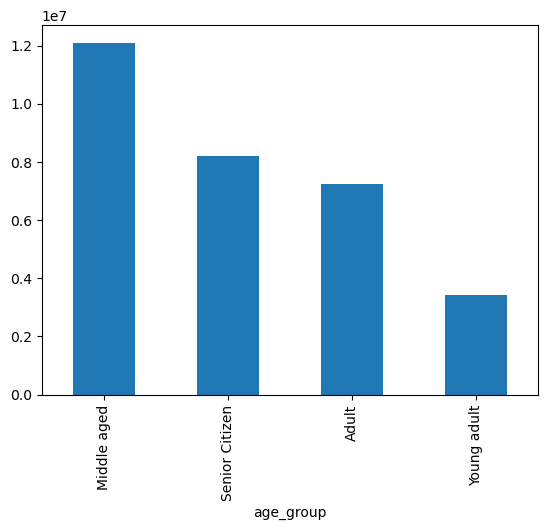

In [75]:
# Create bar chart for age profile of customers
bar_chart_age = df_ords_prods_custs_new['age_group'].value_counts().plot.bar()

In [76]:
# Export bar chart for age profile of customers
bar_chart_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_bar_chart.png'))

#### Income profile

In [34]:
#Customer profiling based on income and the quartiles of income brackets
df_ords_prods_custs_new['income'].describe()


count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [35]:
#Categories
#Low Income Customer: < 67292
#Middle Income Customer >=96760& < 128102
#High Income Customer >=128102

In [36]:
# Create an income flag for three income levels 
df_ords_prods_custs_new.loc[df_ords_prods_custs_new['income'] < 96765, 'income_group'] = 'Low Income'

In [37]:
df_ords_prods_custs_new.loc[(df_ords_prods_custs_new['income'] > 96765) & (df_ords_prods_custs_new['income'] < 128102), 'income_group'] = 'Middle Income'

In [38]:
df_ords_prods_custs_new.loc[(df_ords_prods_custs_new['income'] > 128102), 'income_group'] = 'High Income'

In [39]:
# Check df now 
df_ords_prods_custs_new['income_group'].value_counts(dropna=False)

income_group
Low Income       15481137
High Income       7741091
Middle Income     7740712
NaN                  1624
Name: count, dtype: int64

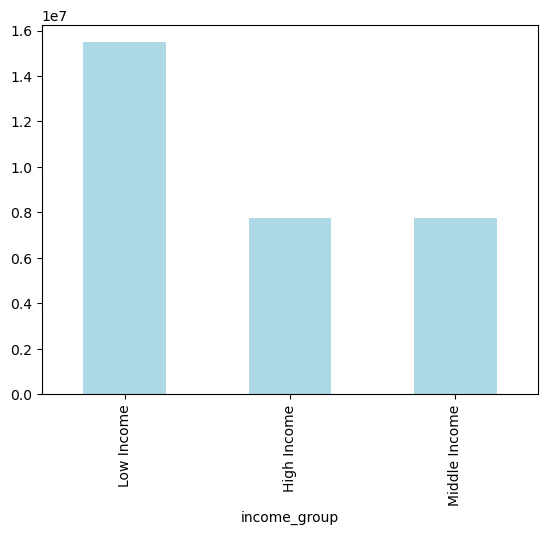

In [72]:
# Bar chart for income groups 
income_groups_bar = df_ords_prods_custs_new['income_group'].value_counts().plot.bar(color = ['lightblue'])

In [73]:
# Export bar chart for income groups 
income_groups_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_groups_bar_chart.png'))

#### Number of dependents

In [40]:
#Number of dependents profile
#Single <1
#Parent >=1


In [41]:
#Customer profiling based on number of dependents
df_ords_prods_custs_new['n_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [42]:
# Create dependants flag 
df_ords_prods_custs_new.loc[df_ords_prods_custs_new['n_dependants'] > 0, 'dependents_flag'] = 'Has dependants'

In [43]:
df_ords_prods_custs_new.loc[df_ords_prods_custs_new['n_dependants'] ==0 , 'dependents_flag'] = 'No dependants'

In [44]:
#Check output
df_ords_prods_custs_new['dependents_flag'].value_counts(dropna=False)

dependents_flag
Has dependants    23224883
No dependants      7739681
Name: count, dtype: int64

###  The relationship between dependants and age group

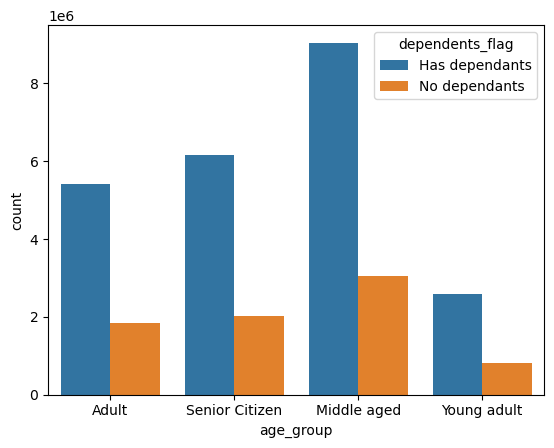

In [46]:
clusterbar1 = sns.countplot(data=df_ords_prods_custs_new, x='age_group', hue='dependents_flag')

#### People of all ages have dependants.Thos with dependants are likely to buy from certain departments?

In [47]:
#Export and save 
clusterbar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dependants.png'), bbox_inches='tight')

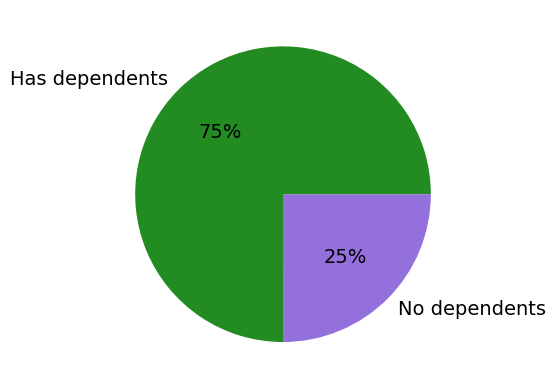

In [70]:
# Pie chart for dependents_profile

dependents_pie_chart = df_ords_prods_custs_new['dependents_flag'].value_counts().plot.pie(label='', labels=['Has dependents', 'No dependents'], autopct=('%1.f%%'), colors=['forestgreen','mediumpurple'], textprops={'fontsize': 14})

In [71]:
# Export pie chart for dependents_profile

dependents_pie_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_pie_chart.png'))

## Customers with dependants and no dependants shopping in different departments
Baby items

Personal care

In [48]:
# To make the results easier to interpret, add department labels to the dataframe.Merge with the 'departments_wrangled' file
# Import departmemts datafile
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [49]:
#Check output
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [50]:
# Renaming 'Unnamed' column
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [51]:
#Check output
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [52]:
df_dept.dtypes

department_id     int64
department       object
dtype: object

In [53]:
# Check the shape 
df_dept.shape

(21, 2)

In [54]:
#Check the datatype of department_id in df 
df_ords_prods_custs_new['department_id'].dtypes

dtype('int64')

In [55]:
# Check the shape 
df_ords_prods_custs_new.shape

(30964564, 40)

In [56]:
# Drop the existing '_merge' column from the previous exercises
df_ords_prods_custs_new1= df_ords_prods_custs_new.drop(['_merge'], axis =1)

In [57]:
# Merging the two dataframes 
ords_prods_custs_dept_merged = df_ords_prods_custs_new1.merge(df_dept, on = 'department_id', indicator = True)

In [58]:
#Check shape
ords_prods_custs_dept_merged.shape

(30964564, 41)

In [59]:
#Check output
ords_prods_custs_dept_merged.head()

,Unnamed: 0.1,order_id,user_id,eval_set,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_time_customers,product_id,...,n_dependants,marital_status,income,region,activity_flag,age_group,income_group,dependents_flag,department,_merge
0,0,2539329,1,prior,1,2,8,NaN,True,196,...,3,married,40423,South,High activity,Adult,Low Income,Has dependants,beverages,both
1,0,2539329,1,prior,1,2,8,NaN,True,14084,...,3,married,40423,South,High activity,Adult,Low Income,Has dependants,dairy eggs,both
2,0,2539329,1,prior,1,2,8,NaN,True,12427,...,3,married,40423,South,High activity,Adult,Low Income,Has dependants,snacks,both
3,0,2539329,1,prior,1,2,8,NaN,True,26088,...,3,married,40423,South,High activity,Adult,Low Income,Has dependants,snacks,both
4,0,2539329,1,prior,1,2,8,NaN,True,26405,...,3,married,40423,South,High activity,Adult,Low Income,Has dependants,household,both


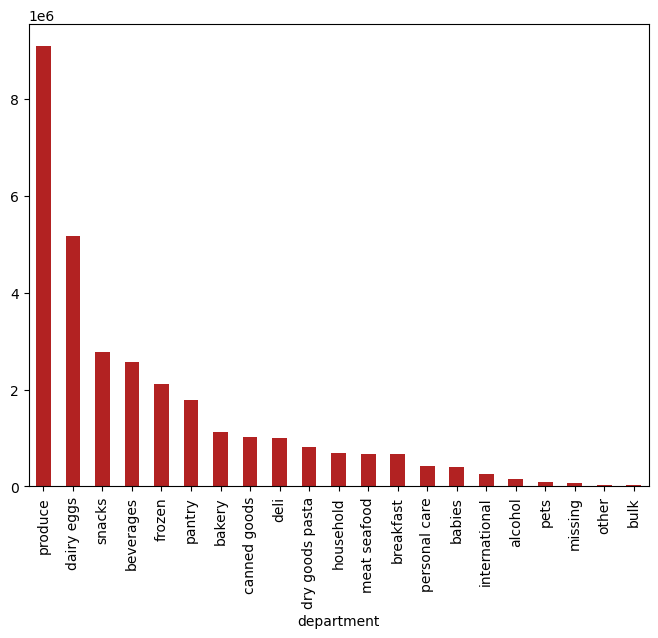

In [60]:
# Create a bar chart for departments

department_bar = ords_prods_custs_dept_merged['department'].value_counts().plot.bar(color=['firebrick'], figsize=(8,6))

In [61]:
#Export bar chart 
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar_chart.png'))

## Baby items department

In [62]:
# Do people with dependants buy the majority of baby items
ords_prods_custs_dept_merged['baby_flag'] = (ords_prods_custs_dept_merged['department'] == 'babies').astype(int)

In [63]:
ords_prods_custs_dept_merged['baby_flag'] = ords_prods_custs_dept_merged.groupby('user_id')['baby_flag'].transform('max')

In [64]:
#Check frequency 
ords_prods_custs_dept_merged['baby_flag'].value_counts(dropna=False)

baby_flag
0    21154311
1     9810253
Name: count, dtype: int64

In [84]:
# Baby_flag and usage frequency 
ords_prods_custs_dept_merged.groupby('baby_flag').agg({'customer_frequency': ['mean', 'min', 'max']})

customer_frequency           
                        mean  min   max
baby_flag                              
0                  10.731215  0.0  30.0
1                   8.287965  0.0  30.0

In [85]:
# Baby_flag and expenditure
ords_prods_custs_dept_merged.groupby('baby_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
baby_flag                         
0          12.480604  1.0  99999.0
1          10.753821  1.0  99999.0

#### Observation -
Customers who did not buy baby supplies have a higher average purchase frequency (10.73) compared to those who purchased baby supplies (8.28). Both groups have the same maximum purchase frequency (30).
Customers who did not buy baby supplies spent more on average (12.4) compared to those who purchased baby supplies (10.7). This suggests that while baby supply purchases may occur less frequently, they tend to be larger in value.
While customers who did not purchase baby supplies make more frequent purchases, they tend to spend less per transaction than those who bought baby supplies. This could imply that baby supply purchases, although less frequent, are typically larger in value.

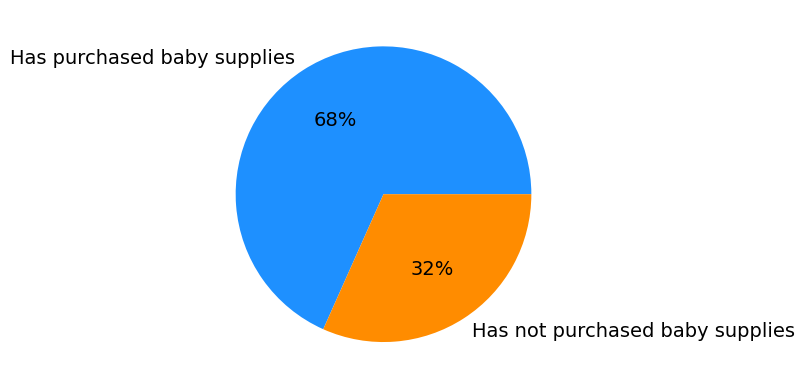

In [65]:
# Pie chart for customers who bought a baby item atleast one time (baby_flag)
baby_pie_chart = ords_prods_custs_dept_merged['baby_flag'].value_counts().plot.pie(label='', labels=['Has purchased baby supplies', 'Has not purchased baby supplies'], autopct=('%1.f%%'), colors=['dodgerblue','darkorange'], textprops={'fontsize': 14})

#### Observation - Most baby items are bought by customers with dependents, likely parents. But, around a quarter of these purchases come from individuals without dependents, possibly purchases made by grandparents. Therefore, baby items shouldn't be marketed exclusively to customers with children.

In [66]:
# Exporting the baby items pie chart
baby_pie_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'babyitems_dependants_pie.png'), bbox_inches='tight')

### Pet Supplies

In [78]:
#Creating pet profiling variable: 
#bought pet supplies(1) 
#didn't buy pet supplies (0)
ords_prods_custs_dept_merged['pet_flag'] = (ords_prods_custs_dept_merged['department'] == 'pets').astype(int)

In [79]:
ords_prods_custs_dept_merged['pet_flag'] = ords_prods_custs_dept_merged.groupby('user_id')['pet_flag'].transform('max')

In [80]:
#Check frequency 
ords_prods_custs_dept_merged['pet_flag'].value_counts(dropna=False)

pet_flag
0    27513213
1     3451351
Name: count, dtype: int64

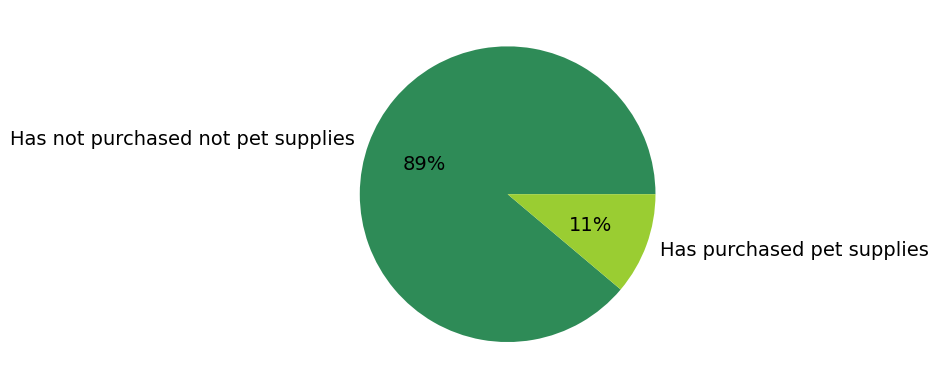

In [83]:
# Pie chart for customers who bought a baby item atleast one time (baby_flag)
pet_pie_chart = ords_prods_custs_dept_merged['pet_flag'].value_counts().plot.pie(label='', labels=['Has not purchased not pet supplies', 'Has purchased pet supplies'], autopct=('%1.f%%'), colors=['seagreen','yellowgreen'], textprops={'fontsize': 14})

In [88]:
# Exporting the baby items pie chart
pet_pie_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'petitems_pie.png'), bbox_inches='tight')

In [86]:
# Baby_flag and usage frequency 
ords_prods_custs_dept_merged.groupby('pet_flag').agg({'customer_frequency': ['mean', 'min', 'max']})

customer_frequency           
                       mean  min   max
pet_flag                              
0                 10.052380  0.0  30.0
1                  9.197913  0.0  30.0

In [87]:
# Baby_flag and expenditure
ords_prods_custs_dept_merged.groupby('pet_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
               mean  min      max
pet_flag                         
0         11.635643  1.0  99999.0
1         14.308121  1.0  99999.0

#### Observation -
Customers who did not purchase pet supplies have a slightly higher average purchase frequency (10.5) compared to those who bought pet supplies (9.19). However, the maximum purchase frequency is the same (30) for both groups.
Customers who purchased pet supplies spent more on average (14.3) compared to those who did not buy pet supplies (11.63). This suggests that pet-related purchases might be associated with higher transaction values.
customers who didn’t purchase pet supplies tend to make more frequent purchases, those who bought pet supplies tend to spend more per transaction. This could suggest that pet supplies purchases are less frequent but larger in value compared to other product categories.

# Compare your customer profiles with regions and departments. Produce suitable charts to illustrate your reports and export them in your project folder.

In [89]:
# Create a crosstab between region and age_profile

age_profile_crosstab = pd.crosstab(ords_prods_custs_dept_merged['region'], ords_prods_custs_dept_merged['age_group'], dropna = False)

In [91]:
#Check crosstab
age_profile_crosstab

age_group,Adult,Middle aged,Senior Citizen,Young adult
region,,,,
Midwest,1691375,2874466,1904046,791626
Northeast,1268947,2108141,1484807,602790
South,2443111,3994431,2708461,1165136
West,1846483,3126872,2098230,855642


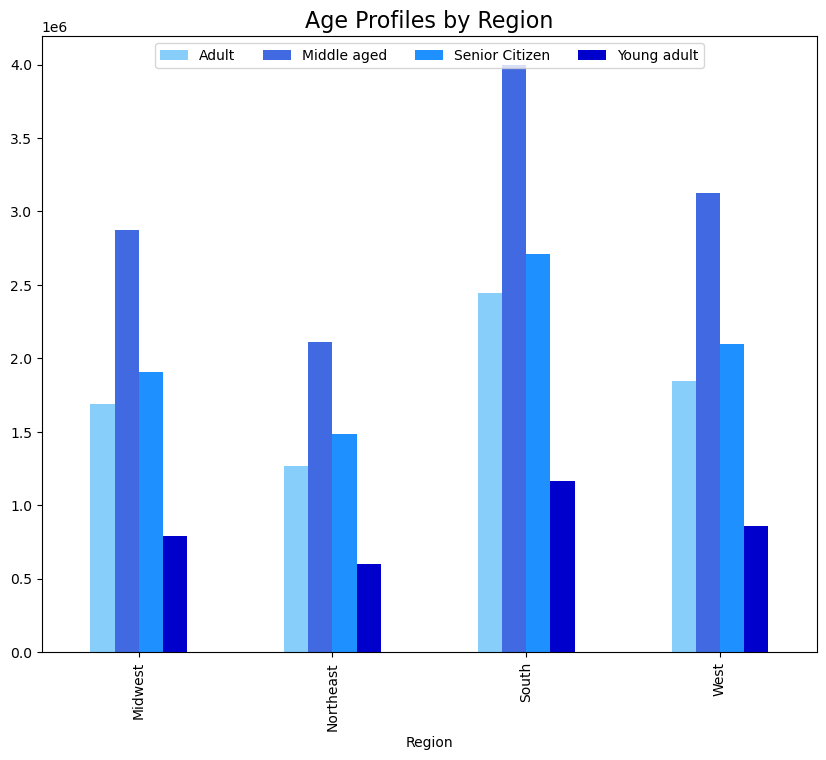

In [94]:
# Create a bar chart for age_profile and region

age_profile_crosstab_bar = age_profile_crosstab.plot(kind ='bar', stacked = False, color = ['LightSkyBlue', 'RoyalBlue', 'DodgerBlue', 'MediumBlue'], figsize=(10, 8))
plt.title('Age Profiles by Region', fontsize = 16)
plt.legend(loc = 'upper center', ncol = 4)
plt.xlabel('Region')
plt.show()

In [95]:
# Export bar chart

age_profile_crosstab_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_regions_bar_chart.png'))

In [96]:
# Create a crosstab for region and income_group

income_group_crosstab = pd.crosstab(ords_prods_custs_dept_merged['region'], ords_prods_custs_dept_merged['income_group'], dropna = False)

In [97]:
# Checking crosstab
income_group_crosstab

income_group,High Income,Low Income,Middle Income,NaN
region,,,,
Midwest,1841838,3568342,1851271,62
Northeast,1372838,2722767,1369080,0
South,2549267,5232335,2528205,1332
West,1977148,3957693,1992156,230


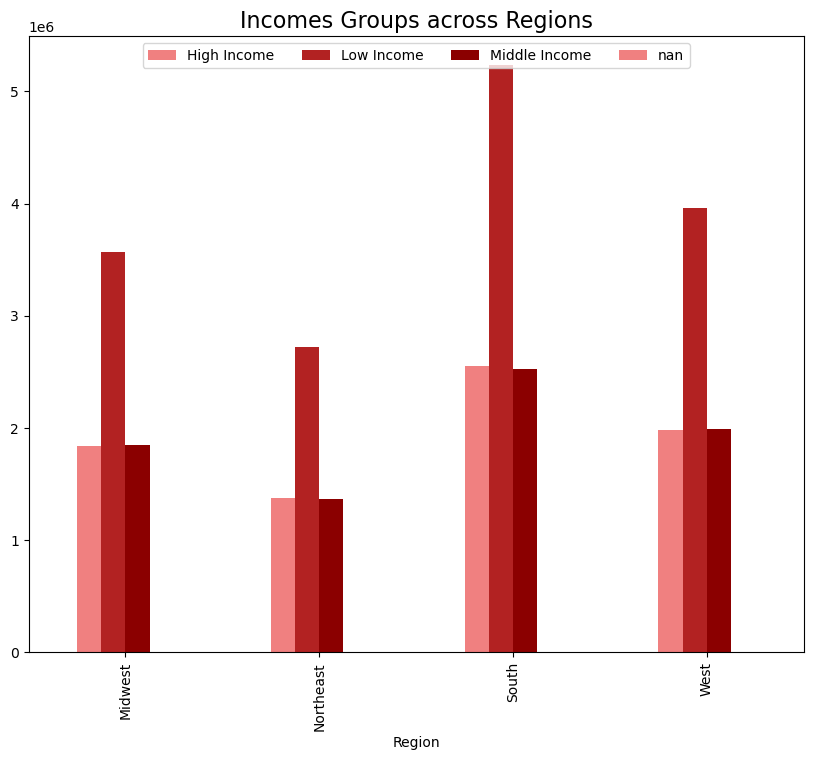

In [99]:
# Create a bar chart for income_group and region

income_group_crosstab_bar = income_group_crosstab.plot(kind ='bar', stacked = False, color = ['LightCoral', 'FireBrick', 'DarkRed'], figsize=(10, 8))
plt.title('Incomes Groups across Regions', fontsize = 16)
plt.legend(loc = 'upper center', ncol = 4)
plt.xlabel('Region')
plt.show()

In [100]:
# Export bar chart
income_group_crosstab_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_regions_bar_chart.png'))

In [101]:
# Create a crosstab for region and dependents_profile
dependents_flag_crosstab = pd.crosstab(ords_prods_custs_dept_merged['region'], ords_prods_custs_dept_merged['dependents_flag'], dropna = False)

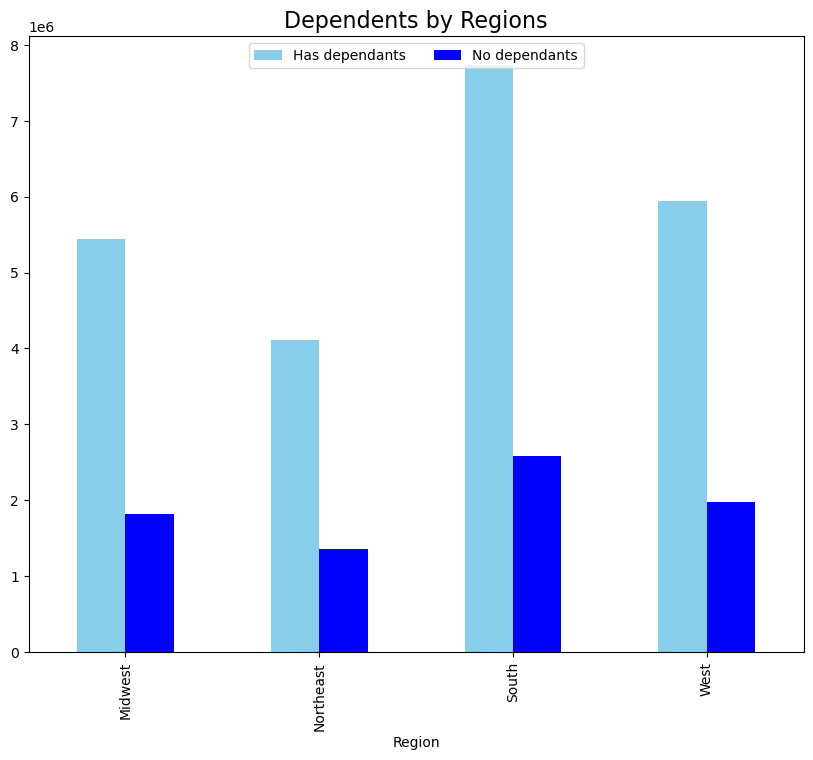

In [103]:
# Create a bar chart for income_group and region

dependents_flag_crosstab_bar = dependents_flag_crosstab.plot(kind ='bar', stacked = False, color = ['skyblue','blue'], figsize=(10, 8))
plt.title('Dependents by Regions', fontsize = 16)
plt.legend(loc = 'upper center', ncol = 4)
plt.xlabel('Region')
plt.show()

In [104]:
# Export bar chart

dependents_flag_crosstab_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_flag_regions_bar_chart.png'))

In [105]:
# Creating crosstab for region and department
region_departments_crosstab_bar = pd.crosstab(ords_prods_custs_dept_merged['department'], ords_prods_custs_dept_merged['region'], dropna = False)

In [106]:
# Checking Crosstab
region_departments_crosstab_bar

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


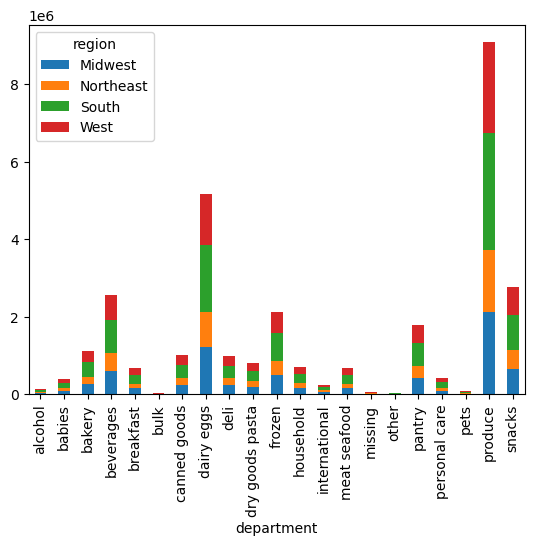

In [107]:
# Region_department Bar Chart
region_departments_crosstab_barchart = region_departments_crosstab_bar.plot(kind='bar', stacked =True)

In [108]:
# Exporting bar chart
region_departments_crosstab_barchart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_department_barchart.png'))

In [109]:
# Creating crosstab for income and frequency
incomegroup_frequencyflag_crosstab = pd.crosstab(ords_prods_custs_dept_merged['income_group'], ords_prods_custs_dept_merged['frequency_flag'], dropna = False)

In [110]:
# Checking crosstab
incomegroup_frequencyflag_crosstab

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
High Income,5331414,700349,1709328
Low Income,10564342,1486423,3430372
Middle Income,5307388,708081,1725243
NaN,1332,122,170


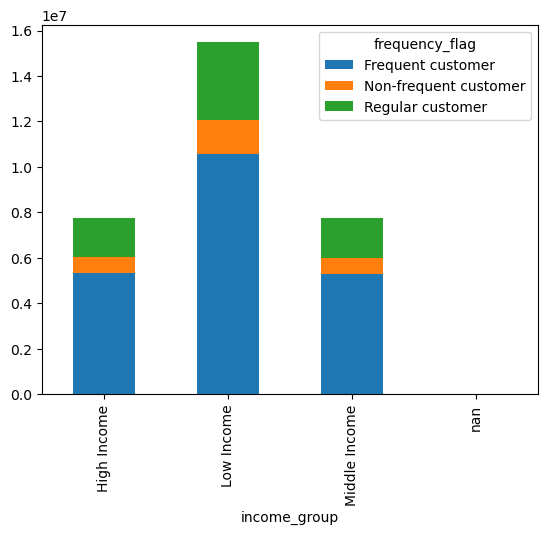

In [111]:
# Income Group and Order frequency Bar Chart
incomegroup_frequencyflag_crosstab_bar = incomegroup_frequencyflag_crosstab.plot(kind='bar', stacked =True)

In [112]:
# Exporting bar chart

incomegroup_frequencyflag_crosstab_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'incomegroup_frequencyflag_crosstab_bar.png'))

In [113]:
# Creating crosstab for age and frequency

agegroup_frequencyflag_crosstab = pd.crosstab(ords_prods_custs_dept_merged['age_group'],ords_prods_custs_dept_merged['frequency_flag'], dropna = False)

In [114]:
#Check output
agegroup_frequencyflag_crosstab

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,4948664,670619,1630633
Middle aged,8274189,1148024,2681697
Senior Citizen,5630976,760132,1804436
Young adult,2350647,316200,748347


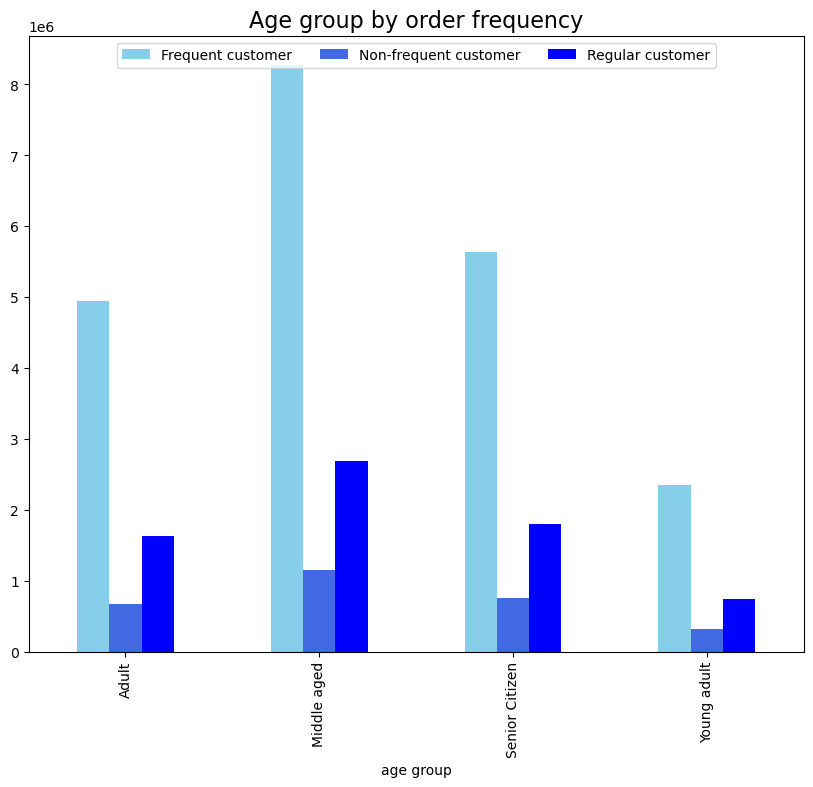

In [119]:
# Income Group and Order frequency Bar Chart
agegroup_frequencyflag_crosstab_bar = agegroup_frequencyflag_crosstab.plot(kind ='bar', stacked = False, color = ['skyblue','royalblue','blue'], figsize=(10, 8))
plt.title('Age group by order frequency', fontsize = 16)
plt.legend(loc = 'upper center', ncol = 4)
plt.xlabel('age group')
plt.show()

In [120]:
# Exporting bar chart
agegroup_frequencyflag_crosstab_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'agegroup_frequencyflag_crosstab_bar.png'))

#### Depicting the product ranges

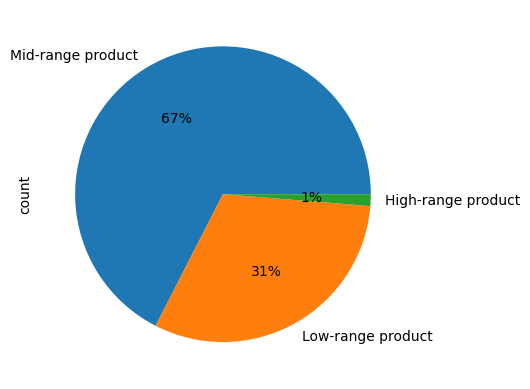

In [129]:
#Create pie chart
price_range_loc_pie = ords_prods_custs_dept_merged['price_range_loc'].value_counts().plot.pie(autopct=('%1.f%%'))

In [122]:
# Export and save

price_range_loc_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_loc_pie.png'))

In [123]:
# Creating crosstab for department and order frequency
dept_frequencyflag_crosstab = pd.crosstab(ords_prods_custs_dept_merged['department'], ords_prods_custs_dept_merged['frequency_flag'], dropna = False)

In [124]:
#Check output
dept_frequencyflag_crosstab

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department,,,
alcohol,100491,13271,30865
babies,316214,25297,68881
bakery,770435,103019,247374
beverages,1756158,244136,571607
breakfast,455837,64106,150907
bulk,25087,2514,5850
canned goods,658729,108011,245334
dairy eggs,3623889,452920,1100373
deli,674588,98098,231148


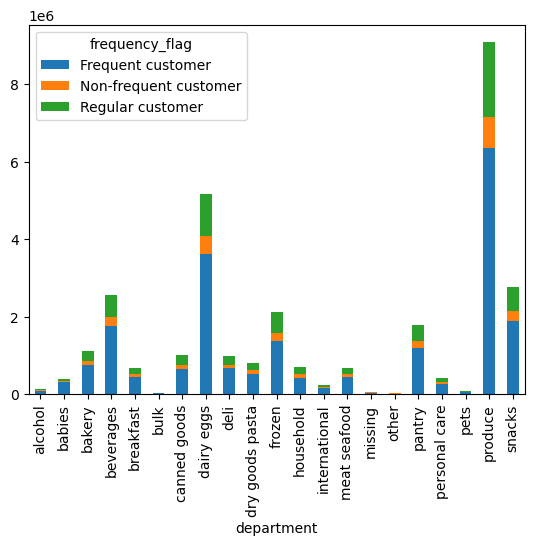

In [125]:
dept_frequencyflag_crosstab_bar = dept_frequencyflag_crosstab.plot(kind='bar', stacked =True)

In [126]:
# Export and save
dept_frequencyflag_crosstab_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_frequencyflag_crosstab_bar.png'))

#### To find the loyal customer count

In [127]:
# Get the amount of loyal customers
ords_prods_custs_dept_merged['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: count, dtype: int64

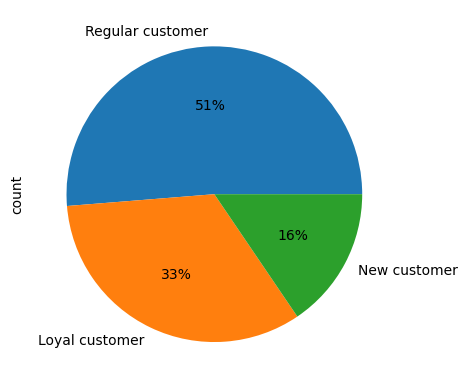

In [130]:
#Create pie chart
loyalty_flag_pie = ords_prods_custs_dept_merged['loyalty_flag'].value_counts().plot.pie(autopct=('%1.f%%'))

In [131]:
#Export pie chart 
loyalty_flag_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_pie_chart.png'))

### Export dataframe

In [132]:
# Export dataframe as a pickle file
ords_prods_custs_dept_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_final.pkl')) 